**решающее дерево, регрессия**

Евгений Борисов <esborisov@sevsu.ru>

---

Yury Kashnitsky   Классификация, деревья решений и метод ближайших соседей   
https://habr.com/ru/companies/ods/articles/322534/

# генерируем набор данных

In [10]:
import numpy as np
import numpy.random as rng
from matplotlib import pyplot as plt

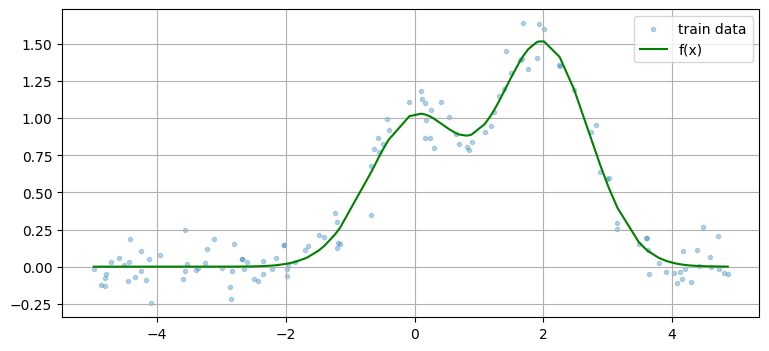

In [39]:
def f(x):
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples=128, noise=.1):
    x = np.sort( rng.rand(n_samples)*10. - 5.)
    return x.reshape(-1,1), (f(x)+rng.normal(0., noise, n_samples)).reshape(-1,1)

X_train,y_train = generate()

# рисуем результат
fig,ax = plt.subplots(figsize=(9,4))
ax.scatter(x=X_train,y=y_train,alpha=.3,marker='.',label='train data') # точки учебного набора
ax.plot(X_train,f(X_train),c='g',label='f(x)')
ax.grid()
ax.legend()

In [33]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train,)

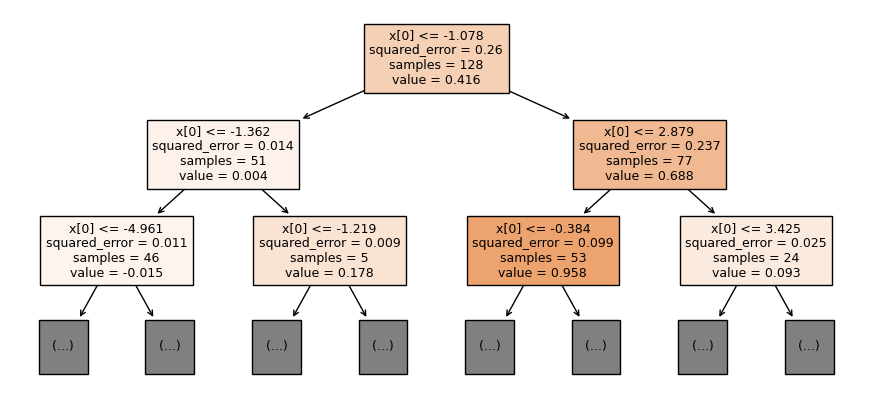

In [41]:
from sklearn.tree import plot_tree

fig,ax = plt.subplots(figsize=(11,5))
plot_tree( model, fontsize=9, filled=True, max_depth=2, ax=ax, ) 
plt.show()

## тестируем

In [35]:
X_test,y_test = generate()
predicted = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error

display( mean_squared_error( y_true=y_test, y_pred = predicted ) )

0.02162952626958368

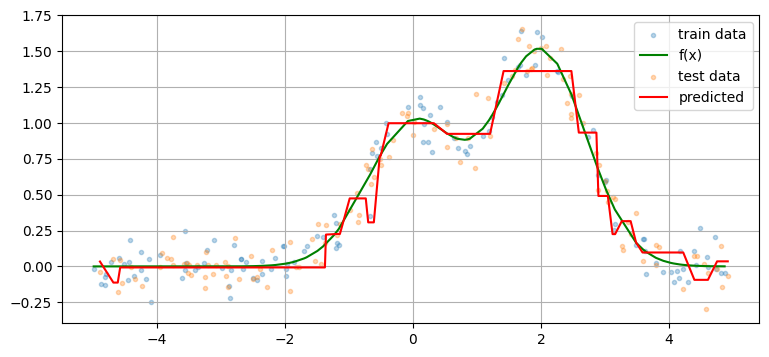

In [42]:
# рисуем результат
fig,ax = plt.subplots(figsize=(9,4))
ax.scatter(x=X_train,y=y_train,alpha=.3,marker='.',label='train data') # точки учебного набора
ax.plot(X_train,f(X_train),c='g',label='f(x)')
ax.scatter(x=X_test,y=y_test,alpha=.3,marker='.',label='test data') # точки учебного набора
ax.plot(X_test,predicted,c='r',label='predicted')
ax.grid()
ax.legend()